

**Description**  (*from:* [UCAR CESM2 Documentation](https://www.earthsystemgrid.org/dataset/ucar.cgd.cesm2le.output.html))  

The CESM2 Large Ensemble consists of 100 members at 1 degree spatial resolution covering the period 1850-2100 under CMIP6 historical and SSP370 future radiative forcing scenarios. Two separate sets of biomass burning emissions forcing files were used within the ensemble. Members 1-50 were forced with CMIP6 protocols identical to those used in Danabasoglu et al. (2020) in the presentation paper for CESM2. For members 51-100, the pertinent species for biomass burning fluxes from the CMIP6 protocols were smoothed with an 11-year running mean filter, impacting the fluxes over the years 1990-2020.

The CESM2 Large Ensemble uses a combination of different oceanic and atmospheric initial states to create ensemble spread as follows:

- Members 1-10: These begin from years 1001, 1021, 1041, 1061, 1081, 1101, 1121, 1141, 1161, and 1181 of the 1400-year pre-industrial control simulation. This segment of the control simulation was chosen to minimize drift.

- Members 11-90: These begin from 4 pre-selected years of the pre-industrial control simulation based on the phase of the Atlantic Meridional Overturning Circulation (AMOC). For each of the 4 initial states, there are 20 ensemble members created by randomly perturbing the atmospheric temperature field by order 10^-14K. The chosen start dates (model years 1231, 1251, 1281, and 1301) sample AMOC and Sea Surface Height (SSH) in the Labrador Sea at their maximum, minimum and transition states.

- Members 91-100: These begin from years 1011, 1031, 1051, 1071, 1091, 1111, 1131, 1151, 1171, and 1191 of the 1400-year pre-industrial control simulation. This set includes the extensive "MOAR" output, which can be used to drive regional climate models.

The initialization design allows assessment of oceanic (AMOC) and atmospheric contributions to ensemble spread, and the impact of AMOC initial-condition memory on the global earth system.

[Output Variable Documentation](https://www.cesm.ucar.edu/community-projects/lens2/output-variables) 

**Data Access**

The CESM2 Large Ensemble dataset can be accessed via:

- Direct HTTP access [UCAR Download](https://www.earthsystemgrid.org/dataset/ucar.cgd.cesm2le.output.html)

- Cloud Native: [Amazon Sustainability Data Initiative](https://aws.amazon.com/marketplace/pp/prodview-xilranwbl2ep2#usage)

**Software Requirements**

```
- https://github.com/intake/intake-esm
    - requests
    - aiohttp
    - s3fs
- matplotlib
- numpy
- pandas
- geopandas
- xarray
```

The rainfall criteria for an ARkStorm are based on scientific models and historical data to represent a massive and sustained atmospheric river event. These criteria include:

Total Rainfall: The ARkStorm scenario envisions total precipitation exceeding 100 inches (about 2,500 millimeters) in some mountainous regions over several weeks. This is comparable to the record-setting rainfall during the 1861-1862 storms.

Duration: The storm is projected to last for an extended period, typically several weeks, with continuous or intermittent heavy rainfall. This prolonged duration is critical for causing widespread flooding and saturation of the soil, leading to mudslides and landslides.

Intensity: The storm would bring episodes of intense rainfall, with rates potentially exceeding 1 inch per hour during the heaviest downpours. This intensity can overwhelm drainage systems and cause flash flooding in urban areas.

Geographic Extent: The ARkStorm would impact a large geographic area, covering much of California, including both coastal and inland regions. The scenario includes significant rainfall in urban areas, agricultural lands, and mountainous regions.

Snowpack Melting: In addition to rainfall, the ARkStorm would likely involve warm atmospheric rivers that can rapidly melt existing snowpack in the Sierra Nevada mountains. This melting snow adds to the overall water volume, exacerbating flooding.

These criteria are designed to simulate a worst-case scenario for planning and preparedness purposes, helping authorities understand potential impacts and develop strategies to mitigate the effects of such an extreme weather event.







In [3]:
import intake
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
from dask.distributed import Client
import matplotlib.pyplot as plt


In [4]:
# List the data available in the Intake Catalog
catalog = intake.open_esm_datastore(
    'https://raw.githubusercontent.com/NCAR/cesm2-le-aws/main/intake-catalogs/aws-cesm2-le.json'
)
catalog

,unique
variable,53
long_name,51
component,4
experiment,2
forcing_variant,2
frequency,3
vertical_levels,3
spatial_domain,3
units,20
start_time,4


In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:51038,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:51053,Total threads: 3
Dashboard: http://127.0.0.1:51057/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:51041,


List the variables that exist within this dataset.

In [4]:
for variable in catalog.df.variable.unique():
    dat = catalog.df.loc[catalog.df.variable == variable].head(1)
    try:
        print(f'{dat["variable"].item():<20} {dat["long_name"].item()}')
    except:
        pass

FLNS                 net longwave flux at surface
FLNSC                clearsky net longwave flux at surface
FLUT                 upwelling longwave flux at top of model
FSNS                 net solar flux at surface
FSNSC                clearsky net solar flux at surface
LHFLX                surface latent heat flux
PRECC                convective precipitation rate (liq + ice)
PRECL                large-scale (stable) precipitation rate (liq + ice)
PRECSC               convective snow rate (water equivalent)
PRECSL               large-scale (stable) snow rate (water equivalent)
PS                   surface pressure
PSL                  sea level pressure
Q                    specific humidity
SHFLX                surface sensible heat flux
T                    temperature
TMQ                  total (vertically integrated) precipitable water
TREFHT               reference height temperature
TREFHTMN             minimum reference height temperature over output period
TREFHTMX          

Find the CESM2 LENS data products that have `TMQ` at a `daily` time resolution. We should have data for two experiments:

1. CMIP6 historical scenario
2. SSP370 future radiative forcing scenario

In [5]:
catalog_subset = catalog.search(variable='TMQ', frequency='daily')
catalog_subset.df

,variable,long_name,component,experiment,forcing_variant,frequency,vertical_levels,spatial_domain,units,start_time,end_time,path
0,TMQ,total (vertically integrated) precipitable water,atm,historical,cmip6,daily,1.0,global,kg/m2,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
1,TMQ,total (vertically integrated) precipitable water,atm,historical,smbb,daily,1.0,global,kg/m2,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
2,TMQ,total (vertically integrated) precipitable water,atm,ssp370,cmip6,daily,1.0,global,kg/m2,2015-01-01 12:00:00,2100-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-ssp370-...
3,TMQ,total (vertically integrated) precipitable water,atm,ssp370,smbb,daily,1.0,global,kg/m2,2015-01-01 12:00:00,2100-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-ssp370-...


In [6]:
# return a dictionary of the datasets in the catalog_subset
dsets = catalog_subset.to_dataset_dict(storage_options={'anon':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency.forcing_variant'


Let's load the historical scenario that uses `cmip6` forcings.

In [7]:
historical_cmip6 = dsets['atm.historical.daily.cmip6']
historical_cmip6

<xarray.Dataset> Size: 666GB
Dimensions:    (member_id: 50, time: 60225, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) <U12 2kB 'r10i1181p1f1' ... 'r9i1301p1f1'
  * time       (time) object 482kB 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    time_bnds  (time, nbnd) object 964kB dask.array<chunksize=(30113, 1), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TMQ        (member_id, time, lat, lon) float32 666GB dask.array<chunksize=(1, 730, 192, 288), meta=np.ndarray>
Attributes: (12/21)
    Conventions:                       CF-1.0
    logname:                           sunseon
    model_doi_url:                     https://doi.org/10.5065/D67H1H0V
    source:                            CAM
    time_period_freq:                  day_1
    topography_file:                   /mnt/lustre/share/CESM/cesm_input/atm/...
    ...                                ...
    intake_esm_attrs:units:            kg/m2
    intake_esm_attrs:start_time:       1850-01-01 12:00:00
    intake_esm_attrs:end_time:         2014-12-31 12:00:00
    intake_esm_attrs:path:             s3://ncar-cesm2-lens/atm/daily/cesm2LE...
    intake_esm_attrs:_data_format_:    zarr
    intake_esm_dataset_key:            atm.historical.daily.cmip6

Plot our area of interest.

/var/folders/6l/9spwppmn3gxfld10q9_szx5h0000gp/T/ipykernel_19268/2108376893.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


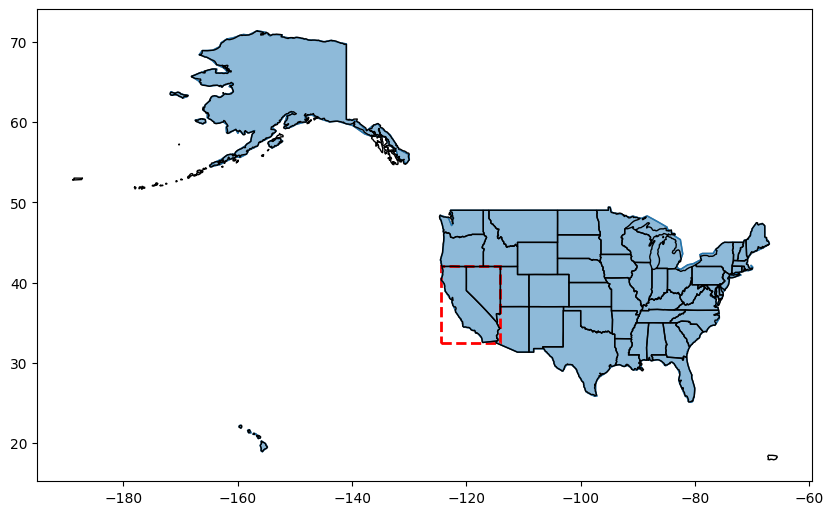

In [8]:
from matplotlib.patches import Rectangle

# Load the sample dataset of the USA states from geopandas
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the dataset for the USA
usa_states = usa[usa['iso_a3'] == 'USA']

# Load the US states from an online source
states_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
states = gpd.read_file(states_url)

# Plot the USA states
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
usa_states.boundary.plot(ax=ax, linewidth=1)
usa_states.plot(ax=ax, alpha=0.5, edgecolor='k')
states.boundary.plot(ax=ax, linewidth=1, color='k', label='State Boundaries')

bbox_coords = [-124.41060660766607,32.5342307609976,-114.13445790587905,42.00965914828148]
bbox = Rectangle((bbox_coords[0],bbox_coords[1]),
                 bbox_coords[2] - bbox_coords[0],
                 bbox_coords[3] - bbox_coords[1],
                 linewidth=2, edgecolor='red', facecolor='none', linestyle='--', label='Bounding Box')
ax.add_patch(bbox)


plt.show()


Our bounding box longtudes are in degrees west, we need to convert this into degrees east to subset the CESM2 data.

In [9]:
bbox_coords = [-124.41060660766607,32.5342307609976,-114.13445790587905,42.00965914828148]
bbox_coords = [360 + bbox_coords[0], bbox_coords[1], 360 + bbox_coords[2], bbox_coords[3]]
bbox_coords

[235.58939339233393, 32.5342307609976, 245.86554209412094, 42.00965914828148]

Slice the data spatial to an area of interest. The following roughly captures California.

In [10]:
# -124.41060660766607,32.5342307609976,-114.13445790587905,42.00965914828148

dat_space = historical_cmip6.sel(lat=slice(bbox_coords[1], bbox_coords[3]),
                           lon=slice(bbox_coords[0], bbox_coords[2]))
dat_space

<xarray.Dataset> Size: 965MB
Dimensions:    (member_id: 50, time: 60225, lat: 10, lon: 8, nbnd: 2)
Coordinates:
  * lat        (lat) float64 80B 33.46 34.4 35.34 36.28 ... 40.05 40.99 41.94
  * lon        (lon) float64 64B 236.2 237.5 238.8 240.0 241.2 242.5 243.8 245.0
  * member_id  (member_id) <U12 2kB 'r10i1181p1f1' ... 'r9i1301p1f1'
  * time       (time) object 482kB 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    time_bnds  (time, nbnd) object 964kB dask.array<chunksize=(30113, 1), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TMQ        (member_id, time, lat, lon) float32 964MB dask.array<chunksize=(1, 730, 10, 8), meta=np.ndarray>
Attributes: (12/21)
    Conventions:                       CF-1.0
    logname:                           sunseon
    model_doi_url:                     https://doi.org/10.5065/D67H1H0V
    source:                            CAM
    time_period_freq:                  day_1
    topography_file:                   /mnt/lustre/share/CESM/cesm_input/atm/...
    ...                                ...
    intake_esm_attrs:units:            kg/m2
    intake_esm_attrs:start_time:       1850-01-01 12:00:00
    intake_esm_attrs:end_time:         2014-12-31 12:00:00
    intake_esm_attrs:path:             s3://ncar-cesm2-lens/atm/daily/cesm2LE...
    intake_esm_attrs:_data_format_:    zarr
    intake_esm_dataset_key:            atm.historical.daily.cmip6

Slice the data to a shorter time range so it's easier to work with.

In [11]:
# slice data for a water-year
# this is for water-year 2010
dat_space_time = dat_space.sel(time=slice('2009-10-01', '2010-09-30'))
dat_space_time

<xarray.Dataset> Size: 6MB
Dimensions:    (member_id: 50, time: 365, lat: 10, lon: 8, nbnd: 2)
Coordinates:
  * lat        (lat) float64 80B 33.46 34.4 35.34 36.28 ... 40.05 40.99 41.94
  * lon        (lon) float64 64B 236.2 237.5 238.8 240.0 241.2 242.5 243.8 245.0
  * member_id  (member_id) <U12 2kB 'r10i1181p1f1' ... 'r9i1301p1f1'
  * time       (time) object 3kB 2009-10-01 12:00:00 ... 2010-09-30 12:00:00
    time_bnds  (time, nbnd) object 6kB dask.array<chunksize=(365, 1), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TMQ        (member_id, time, lat, lon) float32 6MB dask.array<chunksize=(1, 92, 10, 8), meta=np.ndarray>
Attributes: (12/21)
    Conventions:                       CF-1.0
    logname:                           sunseon
    model_doi_url:                     https://doi.org/10.5065/D67H1H0V
    source:                            CAM
    time_period_freq:                  day_1
    topography_file:                   /mnt/lustre/share/CESM/cesm_input/atm/...
    ...                                ...
    intake_esm_attrs:units:            kg/m2
    intake_esm_attrs:start_time:       1850-01-01 12:00:00
    intake_esm_attrs:end_time:         2014-12-31 12:00:00
    intake_esm_attrs:path:             s3://ncar-cesm2-lens/atm/daily/cesm2LE...
    intake_esm_attrs:_data_format_:    zarr
    intake_esm_dataset_key:            atm.historical.daily.cmip6

In [12]:
# resample by month-end (ME) and compute sum 
monthly_cumulative_pcp = dat_space_time.TMQ.resample(time='ME').sum(dim='time')
monthly_cumulative_pcp

<xarray.DataArray 'TMQ' (member_id: 50, time: 12, lat: 10, lon: 8)> Size: 192kB
dask.array<transpose, shape=(50, 12, 10, 8), dtype=float32, chunksize=(1, 1, 10, 8), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 80B 33.46 34.4 35.34 36.28 ... 40.05 40.99 41.94
  * lon        (lon) float64 64B 236.2 237.5 238.8 240.0 241.2 242.5 243.8 245.0
  * member_id  (member_id) <U12 2kB 'r10i1181p1f1' ... 'r9i1301p1f1'
  * time       (time) object 96B 2009-10-31 00:00:00 ... 2010-09-30 00:00:00
Attributes:
    cell_methods:  time: mean
    long_name:     Total (vertically integrated) precipitable water
    units:         kg/m2

Plot data for a group of arbitrary grid cells, for a single member.

In [13]:
dat_space_time_m1 = monthly_cumulative_pcp.isel(member_id=1)
dat_space_time_m1

<xarray.DataArray 'TMQ' (time: 12, lat: 10, lon: 8)> Size: 4kB
dask.array<getitem, shape=(12, 10, 8), dtype=float32, chunksize=(1, 10, 8), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 80B 33.46 34.4 35.34 36.28 ... 40.05 40.99 41.94
  * lon        (lon) float64 64B 236.2 237.5 238.8 240.0 241.2 242.5 243.8 245.0
    member_id  <U12 48B 'r10i1231p1f1'
  * time       (time) object 96B 2009-10-31 00:00:00 ... 2010-09-30 00:00:00
Attributes:
    cell_methods:  time: mean
    long_name:     Total (vertically integrated) precipitable water
    units:         kg/m2

In [14]:
%%time
data = dat_space_time_m1.compute()

CPU times: user 1.92 s, sys: 561 ms, total: 2.49 s
Wall time: 32.4 s


Convert the time variable into a pandas datetime for plotting.

In [15]:
# convert the datetime index into pandas datetime.
data['time'] = data.indexes['time'].to_datetimeindex()

/var/folders/6l/9spwppmn3gxfld10q9_szx5h0000gp/T/ipykernel_19268/1514557157.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time'] = data.indexes['time'].to_datetimeindex()


Plot total precipitable water in inches over our entire bouding box, for each month of data within the prescribed time range.

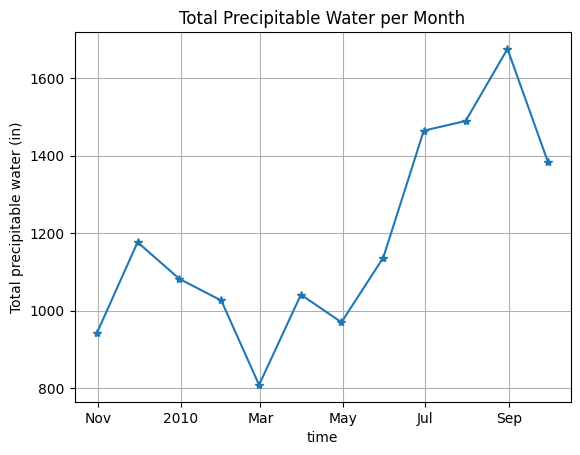

In [16]:
fig, ax = plt.subplots()

# compute total inches of precipitable water
(data.sum(dim=['lat', 'lon']) / 25.4).plot(ax=ax, marker='*')

#series = data.sum(dim=['lat', 'lon']).to_series()
#series.plot(ax=ax);

ax.set_ylabel('Total precipitable water (in)');
ax.set_title('Total Precipitable Water per Month');
ax.grid(True)

Do this for individual cells and identify areas that have large amounts of precipitable water. 

In [17]:
# compute total inches of precipitable water
precip_water = (data / 25.4)

In [18]:
precip_water_nov = precip_water.sel(time="2010-09-30")

tmq = precip_water_nov.where(precip_water_nov==precip_water_nov.max(), drop=True).squeeze()
lat_max = tmq.lat.item()
lon_max = tmq.lon.item()
print(f'Maximum precipitable water: {tmq.item():.2f} inches')
print(f'Location of maximum value is: Lon={lon_max}, Lat={lat_max}')

Maximum precipitable water: 32.87 inches
Location of maximum value is: Lon=245.0, Lat=33.45549738219895


In [19]:
tmq

<xarray.DataArray 'TMQ' ()> Size: 4B
array(32.869583, dtype=float32)
Coordinates:
    lat        float64 8B 33.46
    lon        float64 8B 245.0
    member_id  <U12 48B 'r10i1231p1f1'
    time       datetime64[ns] 8B 2010-09-30

In [20]:
# fig, ax = plt.subplots()

# # compute total inches of precipitable water
# (data.sum(dim=['lat', 'lon']) / 25.4).plot(ax=ax, marker='*')

# #series = data.sum(dim=['lat', 'lon']).to_series()
# #series.plot(ax=ax);

# ax.set_ylabel('Total precipitable water (in)');
# ax.set_title('Total Precipitable Water per Month');
# ax.grid(True)

Compute using a Rolling window

In [21]:
dat_space_time

<xarray.Dataset> Size: 6MB
Dimensions:    (member_id: 50, time: 365, lat: 10, lon: 8, nbnd: 2)
Coordinates:
  * lat        (lat) float64 80B 33.46 34.4 35.34 36.28 ... 40.05 40.99 41.94
  * lon        (lon) float64 64B 236.2 237.5 238.8 240.0 241.2 242.5 243.8 245.0
  * member_id  (member_id) <U12 2kB 'r10i1181p1f1' ... 'r9i1301p1f1'
  * time       (time) object 3kB 2009-10-01 12:00:00 ... 2010-09-30 12:00:00
    time_bnds  (time, nbnd) object 6kB dask.array<chunksize=(365, 1), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TMQ        (member_id, time, lat, lon) float32 6MB dask.array<chunksize=(1, 92, 10, 8), meta=np.ndarray>
Attributes: (12/21)
    Conventions:                       CF-1.0
    logname:                           sunseon
    model_doi_url:                     https://doi.org/10.5065/D67H1H0V
    source:                            CAM
    time_period_freq:                  day_1
    topography_file:                   /mnt/lustre/share/CESM/cesm_input/atm/...
    ...                                ...
    intake_esm_attrs:units:            kg/m2
    intake_esm_attrs:start_time:       1850-01-01 12:00:00
    intake_esm_attrs:end_time:         2014-12-31 12:00:00
    intake_esm_attrs:path:             s3://ncar-cesm2-lens/atm/daily/cesm2LE...
    intake_esm_attrs:_data_format_:    zarr
    intake_esm_dataset_key:            atm.historical.daily.cmip6

In [22]:
rolling = dat_space_time.isel(member_id=1).TMQ.rolling(time=30)

In [23]:
rolling.sum().sum(dim=['lat', 'lon']).compute()

<xarray.DataArray 'TMQ' (time: 365)> Size: 1kB
array([    0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
           0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
           0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
           0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
           0.   ,     0.   ,     0.   ,     0.   ,     0.   , 23379.29 ,
       23121.305, 22920.918, 22851.852, 22751.46 , 22534.572, 22463.633,
       22817.535, 23671.766, 23992.406, 24947.303, 25807.395, 26010.604,
       26252.502, 26684.191, 27344.945, 27563.77 , 27685.904, 27707.797,
       27609.99 , 27410.855, 27252.695, 27325.504, 27557.377, 27855.371,
       28047.31 , 28174.016, 28336.408, 28660.787, 29252.363, 29724.36 ,
       29892.227, 30215.664, 30465.977, 30862.223, 30993.799, 30656.398,
       30245.254, 29637.451, 29562.488, 28766.982, 28129.176, 27891.117,
       27542.158, 27088.156, 26605.375, 26457.889, 26475.922, 26387.67 ,
       26030.508, 25616.857, 25372.742, 25357.115, 25294.162, 25724.957,
       25988.127, 25994.504, 26113.639, 26604.475, 26750.502, 26815.113,
       26869.504, 26569.031, 26287.146, 25873.14 , 25632.053, 25719.668,
       25803.938, 25811.004, 25249.59 , 24915.963, 24901.93 , 25038.457,
       25421.852, 25604.676, 25336.676, 25747.102, 26415.875, 27111.398,
       27852.605, 28607.582, 29067.77 , 28927.215, 28784.234, 27987.02 ,
       27375.133, 27002.6  , 26649.898, 26123.21 , 25683.027, 25257.488,
...
       32579.408, 32899.53 , 33414.574, 33976.805, 34441.094, 34834.055,
       35188.36 , 35517.027, 35877.656, 35856.695, 36075.35 , 36391.95 ,
       36782.598, 36895.414, 36961.457, 36968.42 , 36877.484, 36872.875,
       36811.234, 36942.945, 37203.555, 37435.32 , 37492.18 , 37517.72 ,
       37609.18 , 37251.406, 36656.28 , 36137.668, 35751.125, 35277.785,
       35167.07 , 35534.51 , 35844.68 , 36010.7  , 36170.723, 36105.14 ,
       35924.875, 35931.965, 35906.35 , 35636.582, 35154.96 , 34722.57 ,
       34326.234, 34309.445, 34409.062, 34516.547, 34742.938, 35001.17 ,
       35523.844, 36008.062, 36357.926, 36575.92 , 36665.234, 36572.062,
       36437.758, 36373.37 , 36353.605, 36376.855, 36386.125, 36422.316,
       36453.438, 36516.406, 36811.617, 37070.71 , 37210.492, 37306.727,
       37483.39 , 37674.566, 37965.414, 38257.17 , 38556.13 , 38814.14 ,
       38918.477, 38932.53 , 38950.695, 39015.633, 39097.36 , 39170.445,
       39323.812, 39775.887, 40339.18 , 40781.992, 41276.19 , 41841.445,
       42244.87 , 42592.258, 42972.484, 43210.664, 43321.355, 43451.79 ,
       43671.574, 43825.33 , 43538.87 , 43055.773, 42767.47 , 42899.188,
       42924.234, 42711.29 , 42277.58 , 41797.836, 41342.21 , 40865.383,
       40647.285, 40669.41 , 40865.723, 40680.105, 40031.64 , 39324.164,
       38367.277, 37039.97 , 35780.49 , 35258.312, 35143.6  ],
      dtype=float32)
Coordinates:
    member_id  <U12 48B 'r10i1231p1f1'
  * time       (time) object 3kB 2009-10-01 12:00:00 ... 2010-09-30 12:00:00

**TODO**
- select area spatially (bbox, polygon mask, etc.)
- compute rolling window sum, divide by area to get total inches of precip.
- deterime if criteria are met.
- Move onto next window.
- Parallelize using Dask.
- 
- 
- Compare for different ensemble members

In [24]:
# mask using a single grid cell instead of a polygon. This seems to make more sense.


/var/folders/6l/9spwppmn3gxfld10q9_szx5h0000gp/T/ipykernel_78082/912851672.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


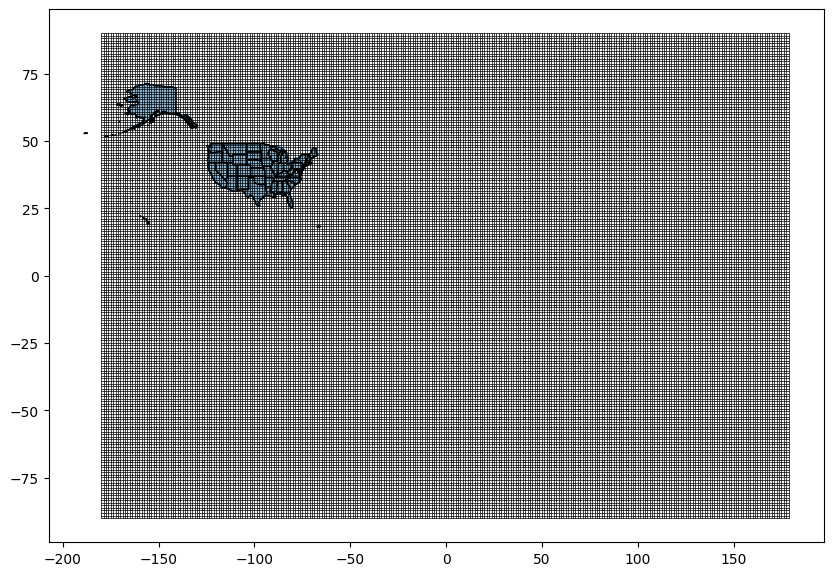

In [25]:
################################
# find a grid cell of interest #
################################

# from matplotlib.patches import Rectangle, Point

# Load the sample dataset of the USA states from geopandas
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the dataset for the USA
usa_states = usa[usa['iso_a3'] == 'USA']

# Load the US states from an online source
states_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
states = gpd.read_file(states_url)

# Plot the USA states
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
usa_states.boundary.plot(ax=ax, linewidth=1)
usa_states.plot(ax=ax, alpha=0.5, edgecolor='k')
states.boundary.plot(ax=ax, linewidth=1, color='k', label='State Boundaries')

# Plot latitude lines
for la in historical_cmip6.lat:
    ax.plot(historical_cmip6.lon-180, [la]*len(historical_cmip6.lon), color='black', linewidth=0.5)

# Plot longitude lines
for lo in historical_cmip6.lon:
    ax.plot([lo-180]*len(historical_cmip6.lat), historical_cmip6.lat, color='black', linewidth=0.5)


plt.show()


In [33]:
# -124.41060660766607,32.5342307609976,-114.13445790587905,42.00965914828148
bbox_coords = [-124.41060660766607,
               32.0,
               -114.13445790587905,
               43.0]
bbox_coords = [180 + bbox_coords[0], bbox_coords[1], 180 + bbox_coords[2], bbox_coords[3]]
bbox_coords
dat_space = historical_cmip6.sel(lat=slice(bbox_coords[1], bbox_coords[3]),
                           lon=slice(bbox_coords[0], bbox_coords[2]))
dat_space

<xarray.Dataset> Size: 1GB
Dimensions:    (member_id: 50, time: 60225, lat: 12, lon: 8, nbnd: 2)
Coordinates:
  * lat        (lat) float64 96B 32.51 33.46 34.4 35.34 ... 40.99 41.94 42.88
  * lon        (lon) float64 64B 56.25 57.5 58.75 60.0 61.25 62.5 63.75 65.0
  * member_id  (member_id) <U12 2kB 'r10i1181p1f1' ... 'r9i1301p1f1'
  * time       (time) object 482kB 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    time_bnds  (time, nbnd) object 964kB dask.array<chunksize=(30113, 1), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TMQ        (member_id, time, lat, lon) float32 1GB dask.array<chunksize=(1, 730, 12, 8), meta=np.ndarray>
Attributes: (12/21)
    Conventions:                       CF-1.0
    logname:                           sunseon
    model_doi_url:                     https://doi.org/10.5065/D67H1H0V
    source:                            CAM
    time_period_freq:                  day_1
    topography_file:                   /mnt/lustre/share/CESM/cesm_input/atm/...
    ...                                ...
    intake_esm_attrs:units:            kg/m2
    intake_esm_attrs:start_time:       1850-01-01 12:00:00
    intake_esm_attrs:end_time:         2014-12-31 12:00:00
    intake_esm_attrs:path:             s3://ncar-cesm2-lens/atm/daily/cesm2LE...
    intake_esm_attrs:_data_format_:    zarr
    intake_esm_dataset_key:            atm.historical.daily.cmip6

Compute grid cells and their areas. Note, lat/lon in our dataset represent the center point of the grid cell. we can verify this by plotting the data and the lat/lon.

In [45]:
pcp_data = dat_space.isel(time=1).isel(member_id=1).TMQ.compute()

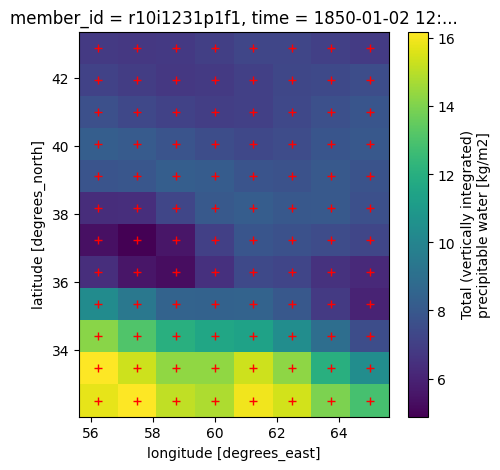

In [122]:
# Plot the USA staates
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

pcp_data.plot(ax=ax, zorder=-1)

# lons = dat_space.lon
# # Plot latitude lines
# for la in dat_space.lat:
#     ax.plot(lons, [la-lat_offset]*len(lons), color='red', linewidth=0.5, zorder=10)
# ax.plot(lons, [la+lat_offset]*len(lons), color='red', linewidth=0.5, zorder=10)

# # Plot longitude lines
# for lo in lons:
#     ax.plot([lo]*len(lats), lats, color='red', linewidth=0.5)

for la in dat_space.lat:
    for lo in dat_space.lon:
        ax.plot(lo, la, color='red', marker='+', zorder=1000)



In [132]:
import numpy as np
import xarray as xr

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in km
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

def compute_grid_cell_areas(ds):
    lats = ds['lat'].values
    lons = ds['lon'].values
    
    # Calculate the edges of the latitude and longitude grid
    lat_edges = (lats[:-1] + lats[1:]) / 2
    lat_edges = np.concatenate(([lats[0] - (lat_edges[0] - lats[0])], lat_edges, [lats[-1] + (lats[-1] - lat_edges[-1])]))
       
    lon_edges = (lons[:-1] + lons[1:]) / 2
    lon_edges = np.concatenate(([lons[0] - (lon_edges[0] - lons[0])], lon_edges, [lons[-1] + (lons[-1] - lon_edges[-1])]))
    
    # Calculate distances between latitude edges for all longitude points
    lat_distances = np.zeros((len(lats), len(lons)))
    for i in range(len(lons)):
        lat_distances[:, i] = haversine_distance(lat_edges[:-1], lons[i], lat_edges[1:], lons[i])
        
    # Calculate distances between longitude edges for all latitude points
    lon_distances = np.zeros((len(lats), len(lons)))
    for i in range(len(lats)):
        lon_distances[i, :] = haversine_distance(lats[i], lon_edges[:-1], lats[i], lon_edges[1:])
    
    # Calculate the area of each grid cell
    areas = lat_distances * lon_distances
    
    return xr.DataArray(areas, dims=('lat', 'lon'), coords={'lat': ds['lat'], 'lon': ds['lon']})


In [135]:
grid_areas_km2 = compute_grid_cell_areas(dat_space)

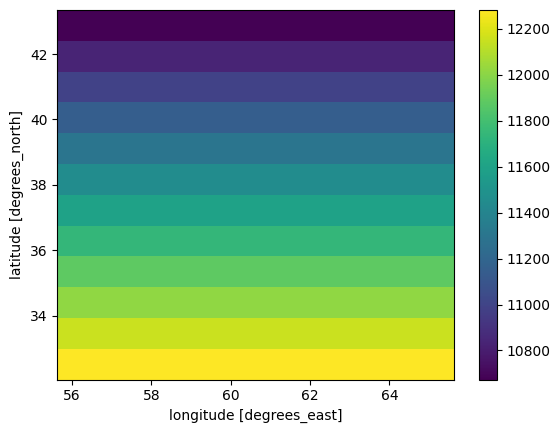

In [136]:
grid_areas_km2.plot()

/var/folders/6l/9spwppmn3gxfld10q9_szx5h0000gp/T/ipykernel_78082/3528624666.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ilon=1, ilat=8


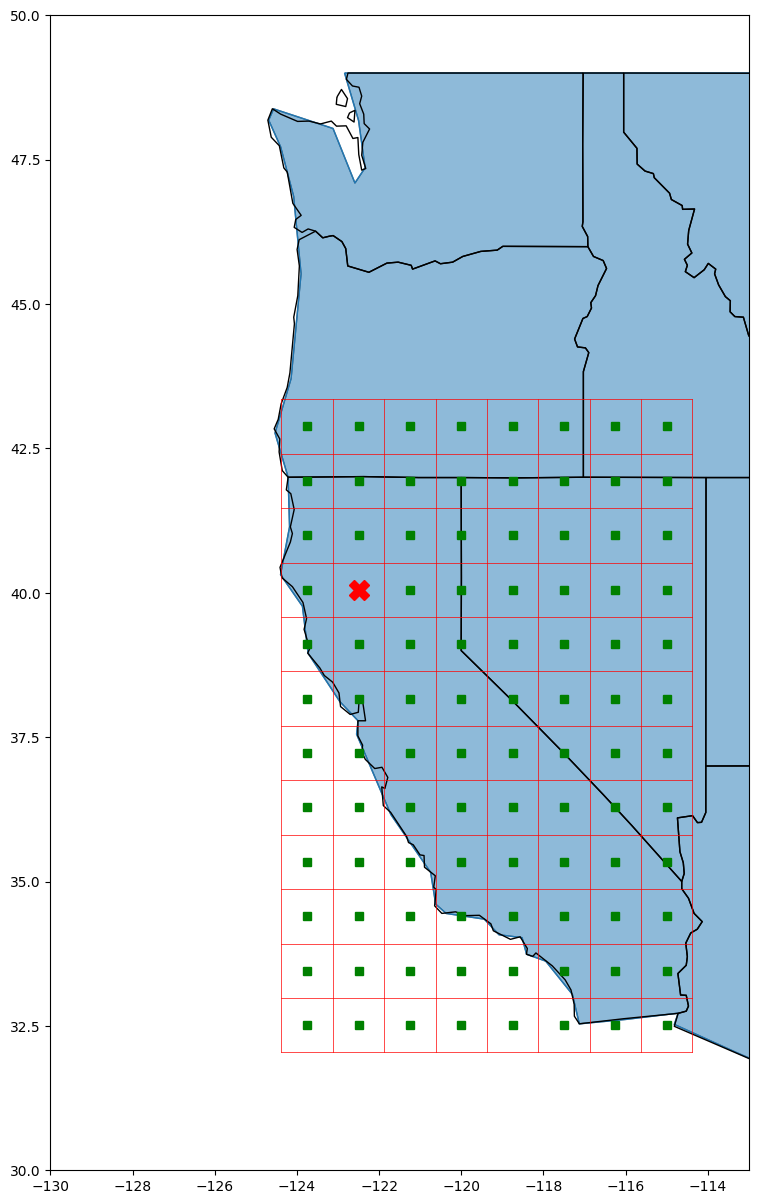

In [36]:
import numpy as np

# Load the sample dataset of the USA states from geopandas
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the dataset for the USA
usa_states = usa[usa['iso_a3'] == 'USA']

# Load the US states from an online source
states_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
states = gpd.read_file(states_url)

# Plot the USA staates
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
usa_states.boundary.plot(ax=ax, linewidth=1)
usa_states.plot(ax=ax, alpha=0.5, edgecolor='k')
states.boundary.plot(ax=ax, linewidth=1, color='k', label='State Boundaries')


lon_offset = np.diff(dat_space.lon.values)[0] / 2
lat_offset = np.diff(dat_space.lat.values)[0] / 2

lon_array = dat_space.lon.values
lons = [lo-180-lon_offset for lo in lon_array]
lons += [lon_array[-1] - 180 + lon_offset]


lat_array = dat_space.lat.values
lats = [la-lat_offset for la in lat_array]
lats += [lat_array[-1] + lat_offset]


# Plot latitude lines
for la in dat_space.lat:
    # ax.plot(dat_space.lon-180-lon_offset, [la-lat_offset]*len(dat_space.lon), color='red', linewidth=0.5)
    ax.plot(lons, [la-lat_offset]*len(lons), color='red', linewidth=0.5)
ax.plot(lons, [la+lat_offset]*len(lons), color='red', linewidth=0.5)

# Plot longitude lines
for lo in lons:
    ax.plot([lo]*len(lats), lats, color='red', linewidth=0.5)

for la in dat_space.lat:
    for lo in dat_space.lon:
        ax.plot(lo-180, la, color='green', marker='s')

i = 1
j = 8
xlon = dat_space.isel(lon=i).lon.item()
ylat = dat_space.isel(lat=j).lat.item()

print(f'ilon={i}, ilat={j}')
ax.plot(xlon-180, ylat, color='red', marker='X', markersize=14)


ax.set_xlim(-130, -113)
ax.set_ylim(30, 50)


plt.show()


In [37]:

# mask using a single grid cell instead of a polygon. This seems to make more sense.
dat = historical_cmip6.isel(lat=j, lon=i).isel(member_id=1).sel(time=slice('2000-10-01', '2010-12-31'))

dat

<xarray.Dataset> Size: 105kB
Dimensions:    (time: 3742, nbnd: 2)
Coordinates:
    lat        float64 8B -82.46
    lon        float64 8B 1.25
    member_id  <U12 48B 'r10i1231p1f1'
  * time       (time) object 30kB 2000-10-01 12:00:00 ... 2010-12-31 12:00:00
    time_bnds  (time, nbnd) object 60kB dask.array<chunksize=(3742, 1), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TMQ        (time) float32 15kB dask.array<chunksize=(457,), meta=np.ndarray>
Attributes: (12/21)
    Conventions:                       CF-1.0
    logname:                           sunseon
    model_doi_url:                     https://doi.org/10.5065/D67H1H0V
    source:                            CAM
    time_period_freq:                  day_1
    topography_file:                   /mnt/lustre/share/CESM/cesm_input/atm/...
    ...                                ...
    intake_esm_attrs:units:            kg/m2
    intake_esm_attrs:start_time:       1850-01-01 12:00:00
    intake_esm_attrs:end_time:         2014-12-31 12:00:00
    intake_esm_attrs:path:             s3://ncar-cesm2-lens/atm/daily/cesm2LE...
    intake_esm_attrs:_data_format_:    zarr
    intake_esm_dataset_key:            atm.historical.daily.cmip6

Get the grid cell size

In [139]:
%%time

res = dat.TMQ.rolling(time=30).sum().compute()

CPU times: user 12.4 s, sys: 4.02 s, total: 16.5 s
Wall time: 3min 13s


In [141]:
# convert the datetime index into pandas datetime.
res['time'] = res.indexes['time'].to_datetimeindex()

/var/folders/6l/9spwppmn3gxfld10q9_szx5h0000gp/T/ipykernel_78082/508187735.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  res['time'] = res.indexes['time'].to_datetimeindex()


Divide by the area of the grid cell to get total TMQ per unit area.

In [142]:
area = grid_areas_km2.isel(lat=j, lon=i)

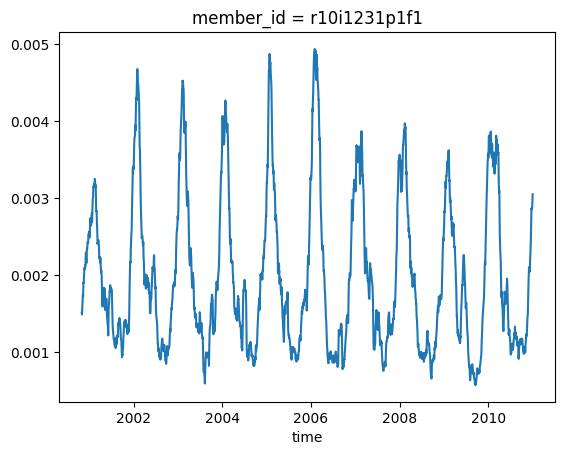

In [143]:
# --------------
# NOTE NOTE NOTE
# --------------
# I don't think this is necessary b/c TMQ is already in units of kg/m2 which is equiv to mm.
# I'm assuming that each value represents the total depth of water across the grid cell area. 
# TODO: read through the documentation to verify this.

(res / area).plot()

/var/folders/6l/9spwppmn3gxfld10q9_szx5h0000gp/T/ipykernel_32526/2939310017.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  res['time'] = res.indexes['time'].to_datetimeindex()


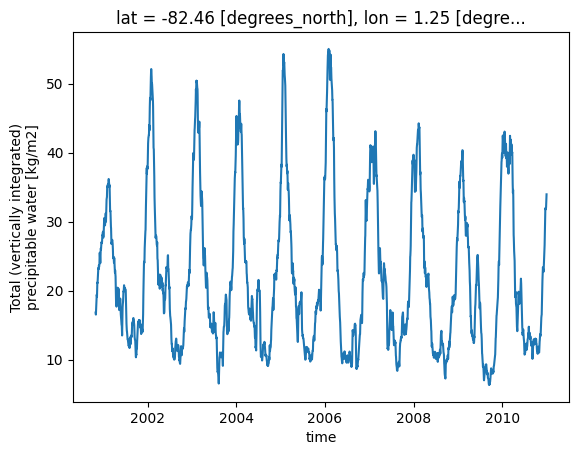

In [25]:


res.plot();
